In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Ячейка обязательная, если запускать в коллабе, чтобы файле сохранились на диске
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


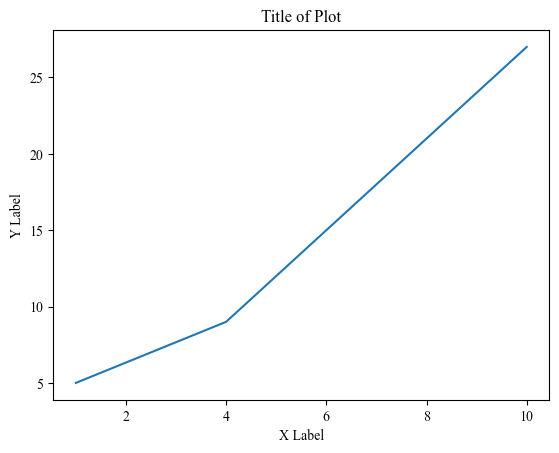

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

#define x and y
x = [1, 4, 10]
y = [5, 9, 27]

#create line plot
plt.plot (x, y)

#add title and axis labels
plt.title('Title of Plot')
plt.xlabel('X Label')
plt.ylabel('Y Label')

#display plot
plt.show() 

In [3]:
lenta = pd.read_csv('reduced_lenta.csv')

In [4]:
lenta

,url,title,text,topic,tags,date,publication_year,text_clear,lemm_clean_text,result_clean_text
0,https://lenta.ru/news/2013/01/01/goaway/,Репортера The New York Times выгнали из Китая,Корреспондент газеты The New York Times Крис Б...,Интернет и СМИ,Все,2013/01/01,2013,корреспондент газеты крис бакли вынужден покин...,корреспондент газета крис баклать вынуждать по...,корреспондент газета крис баклать вынуждать по...
1,https://lenta.ru/news/2013/01/01/georgia/,Иванишвили объявил о прекращении преследования...,Премьер-министр Грузии Бидзина Иванишвили в но...,Бывший СССР,Все,2013/01/01,2013,премьер министр грузии бидзина иванишвили ново...,премьер министр грузия бидзина иванишвили ново...,премьер министр грузия бидзина иванишвили ново...
2,https://lenta.ru/news/2013/01/01/tea/,В Индии работники чайной плантации съели работ...,В Индии полиция обвинила рабочих чайной планта...,Мир,Все,2013/01/01,2013,индии полиция обвинила рабочих чайной плантаци...,индии полиция обвинять рабочий чайный плантаци...,индии полиция обвинять рабочий чайный плантаци...
3,https://lenta.ru/news/2013/01/01/icoast/,В давке у стадиона в Кот-д’Ивуаре погибли 60 ч...,В давке у стадиона в крупнейшем городе Кот-д’И...,Мир,Все,2013/01/01,2013,давке стадиона крупнейшем городе кот д ивуара ...,давке стадион крупный город кот д ивуар абиджа...,давке стадион крупный кот д ивуар абиджан поги...
4,https://lenta.ru/news/2013/01/01/driver/,На Украине задержан сбивший восьмерых пешеходов,"Украинская милиция задержала водителя, сбившег...",Бывший СССР,Все,2013/01/01,2013,украинская милиция задержала водителя сбившего...,украинская милиция задерживать водитель сбиват...,украинская милиция задерживать водитель сбиват...
...,...,...,...,...,...,...,...,...,...,...
39558,https://lenta.ru/news/2023/12/31/rossiyskiy-ak...,Олимпийская чемпионка предсказала приглашение ...,Двукратная олимпийская чемпионка по биатлону С...,Спорт,Олимпиада,2023-12-31,2023,двукратная олимпийская чемпионка биатлону свет...,двукратная олимпийский чемпионка биатлон светл...,двукратная олимпийский чемпионка биатлон светл...
39559,https://lenta.ru/news/2023/12/31/nazvany-luchs...,Раскрыта длительность новогоднего обращения Пу...,Новогоднее обращение президента России Владими...,Россия,Политика,2023-12-31,2023,новогоднее обращение президента россии владими...,новогоднее обращение президент россия владимир...,новогоднее обращение президент владимир путин ...
39560,https://lenta.ru/news/2023/12/31/vuchich-ob-ya...,В Киеве объявили воздушную тревогу,В Киеве вечером 31 декабря объявили воздушную ...,Бывший СССР,Украина,2023-12-31,2023,киеве вечером декабря объявили воздушную трево...,киеве вечер декабрь объявлять воздушный тревог...,киеве декабрь объявлять воздушный тревога свид...
39561,https://lenta.ru/news/2023/12/31/v-sevastopole...,На Украине рассказали о полученной за год помо...,Киев в 2023 году получил от западных партнеров...,Бывший СССР,Украина,2023-12-31,2023,киев году получил западных партнеров миллиарда...,киев год получать западный партнер миллиард до...,киев получать западный партнер миллиард доллар...


In [7]:
lenta['date'] = pd.to_datetime(lenta['date'], format='mixed')

# Извлекаем год из даты
lenta['year'] = lenta['date'].dt.year

years = {}
for i in lenta['year']:
    if i in years:
        years[i]+= 1
    else:
        years[i] = 1

In [8]:
years

{2013: 3650,
 2014: 3650,
 2015: 3650,
 2016: 3660,
 2017: 3650,
 2018: 3650,
 2019: 3655,
 2020: 3660,
 2021: 3650,
 2022: 3640,
 2023: 3048}

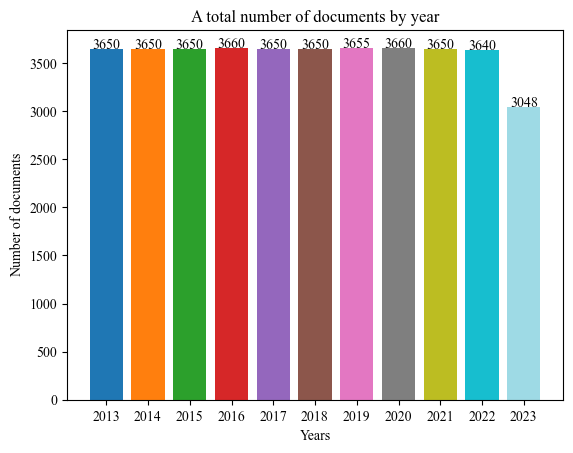

In [9]:
import numpy as np 
colors = plt.cm.tab20(np.linspace(0, 1, len(years)))

years_keys = list(years.keys())
years_values = list(years.values())

# Строим график
plt.bar(years_keys, years_values, color=colors)

# Настройка осей
plt.xlabel('Years')
plt.ylabel('Number of documents')
plt.title('A total number of documents by year')
for i, v in enumerate(years_values):
    plt.text(years_keys[i], v + 0.5, str(v), ha='center')

plt.xticks(years_keys) 
plt.savefig("Lenta-Distribution.png", format='png', dpi=1000,
                   bbox_inches='tight', pad_inches=0)

In [4]:
lenta_timestamps = lenta.date.to_list()
lenta['result_clean_text'] = lenta['result_clean_text'].astype(str)
lenta_posts = lenta.result_clean_text.to_list()

In [6]:
from bertopic import BERTopic

topic_model = BERTopic(language="russian", verbose=True)
topics, probs = topic_model.fit_transform(lenta_posts)

c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-20 11:17:59,675 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 1237/1237 [42:14<00:00,  2.05s/it]
2024-05-20 12:00:21,616 - BERTopic - Embedding - Completed ✓
2024-05-20 12:00:21,618 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-20 12:01:07,466 - BERTopic - Dimensionality - Completed ✓
2024-05-20 12:01:07,468 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-20 12:01:10,533 - BERTopic - Cluster - Completed ✓
2024-05-20 12:01:10,567 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-20 12:01:14,537 - BERTopic - Representation - Completed ✓


In [7]:
topic_model.save("lenta_model")

2024-05-20 12:01:17,803 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [5]:
from bertopic import BERTopic
topic_model = BERTopic.load("lenta_model")

c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
topics_over_time = topic_model.topics_over_time(lenta_posts, lenta_timestamps, datetime_format="mixed", nr_bins=20)

20it [00:26,  1.31s/it]


In [7]:
topics_over_time = topic_model.topics_over_time(lenta_posts, lenta_timestamps,
                                                datetime_format="mixed",
                                                global_tuning=True, evolution_tuning=True, nr_bins=20)

20it [00:25,  1.28s/it]


In [8]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [9]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5])

In [9]:
topics_over_time["Year"] = topics_over_time["Timestamp"].astype(str).str[:4].astype(int)

In [10]:
selected_topics = topics_over_time[topics_over_time['Topic'] > -1]

In [11]:
topic_counts = selected_topics.groupby("Name")["Frequency"].sum()

# Выбор топ-20 тем
top_20_topics = topic_counts.nlargest(20).index

grouped_lenta = selected_topics.groupby(["Year", "Name"])["Frequency"].sum().unstack(fill_value=0)

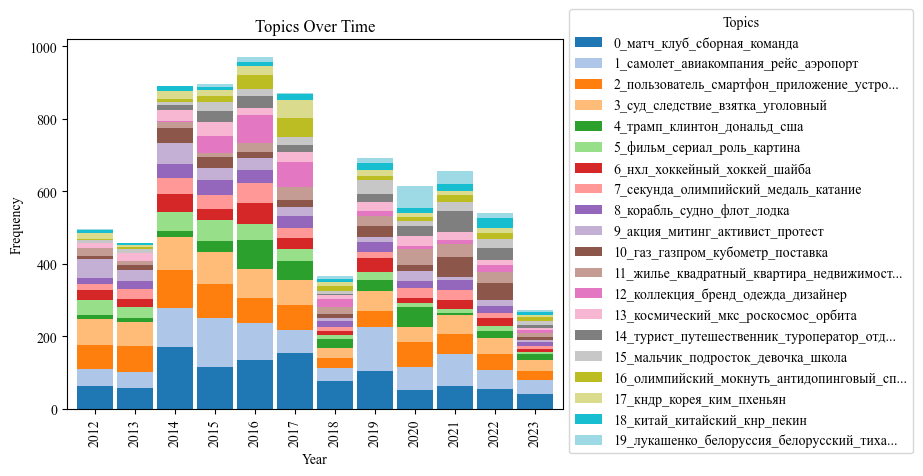

In [12]:
# Фильтрация данных по топ-20 темам
filtered_data = grouped_lenta[top_20_topics]

import numpy as np
colors = plt.cm.tab20(np.linspace(0, 1, len(filtered_data.columns)))
# Построение графика
filtered_data.plot(kind="bar", stacked=True, width=0.9, align='center', color=colors)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Topics Over Time")
plt.legend(title="Topics", loc="upper right", bbox_to_anchor=(1.72, 1.1))
plt.savefig("Lenta_BERTopic-DTM.png", format='png', dpi=1000,
                    bbox_inches='tight', pad_inches=0)
#plt.show()